# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(["seaborn-whitegrid"])

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [3]:
samples =1000
X, y= make_classification(
    n_samples=samples, # 샘플 수
    n_informative=2, # 이진분류, 삼진분류를 정하는 것 
    n_redundant=0, # 노이즈를 설정해주는 것 
    n_clusters_per_class=1 ) # cluster 설정

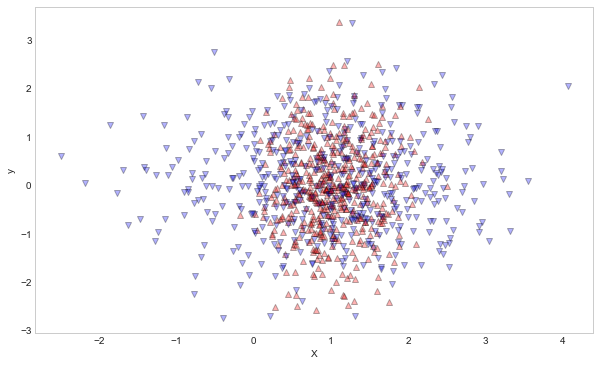

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))

ax.grid() # grid를 지우면 각각의 줄과 칸이 생긴다. 
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i, 0], X[i,1], edgecolors="k", alpha=0.3, marker="^", color="r")
        # edgecolors 각각의 sample들의 테투리 색상지정 
        # alpha : 샘플들의 색상 투명도 
        # marker는 샘플들의 모양
    else:
        ax.scatter(X[i, 0], X[i,1], edgecolors="k", alpha=0.3, marker="v", color="b")

In [5]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
print("학습 테이터 점수 : ", model.score(X_train, y_train))
print("학습 테이터 점수 : ", model.score(X_test, y_test))

학습 테이터 점수 :  0.93875
학습 테이터 점수 :  0.96


In [8]:
scores = cross_val_score(model, X, y, scoring="accuracy", cv=10)
scores.mean()

0.9380000000000001

In [9]:
model.intercept_, model.coef_

(array([-2.40364467]),
 array([[ 2.03408691e+00,  1.69303946e-01, -2.08676951e-03,
          9.93458976e-02, -2.14483302e-01,  1.00051684e-01,
         -2.33887293e-01, -2.82686446e-02, -4.76938496e-02,
          2.33084799e-01,  1.36575525e-01,  4.28920083e-02,
         -1.49210094e-02, -3.64270302e-02,  2.14597344e-01,
          3.60521576e-02, -4.55028752e+00,  8.25751505e-02,
          1.05662512e-01, -1.68390650e-01]]))

In [10]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0] + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1] + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:,1], X[:, 1], c=np.abs(y-1), edgecolors="k", alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel("X")
plt.xlabel("y")

plt.xlim(xx.min(), xx.max())
plt.xlim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## 붓꽃 데이터

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [13]:
species = pd.Series(iris.target, dtype="category")

In [14]:
species = species.cat.rename_categories(iris.target_names)

In [15]:
df["speices"] =  species

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


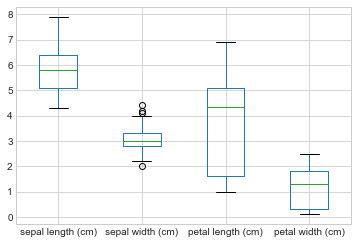

In [17]:
df.boxplot();

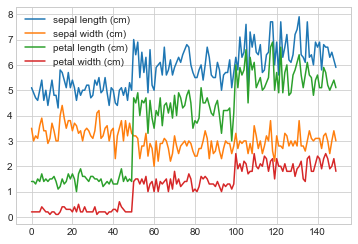

In [18]:
df.plot();

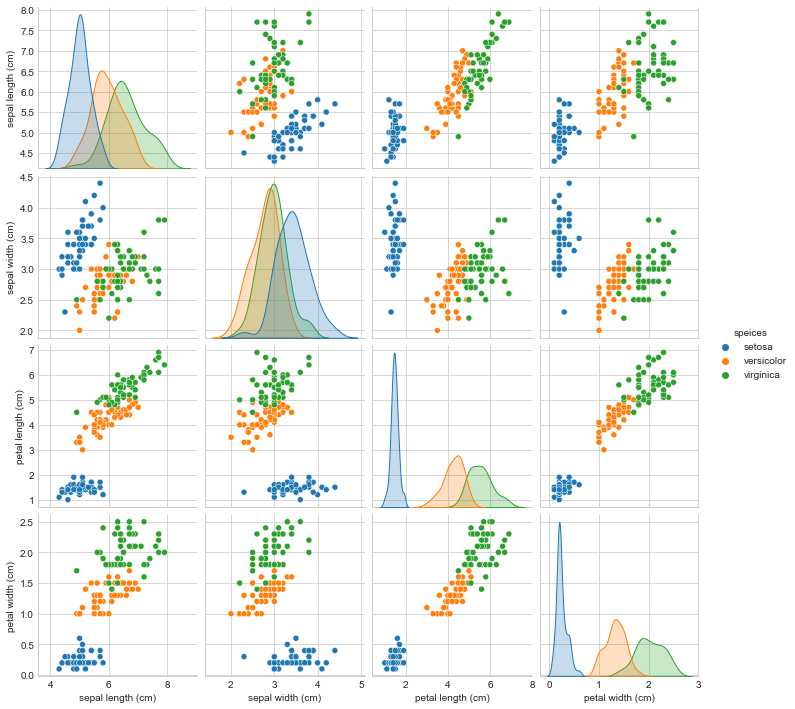

In [19]:
import seaborn as sns
sns.pairplot(df, hue="speices")

## 붓꽃 데이터에 대한 로지스틱 회귀

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
                                    iris.data, iris.target, test_size=0.2,
                                    stratify=iris.target, random_state=8282)

In [21]:
model= LogisticRegression(solver="lbfgs", multi_class="auto", C=100.0, random_state=42)
model.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100.0, random_state=42)

In [22]:
print("학습 테이터 점수 : ", model.score(X_train, y_train))
print("학습 테이터 점수 : ", model.score(X_test, y_test))

학습 테이터 점수 :  0.9916666666666667
학습 테이터 점수 :  0.9666666666666667


In [23]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

In [27]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min()-1,X[:, 0].max()+1
x2_min, x2_max = X[:, 0].min()-1,X[:, 0].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                      np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = ("setosa", "versicolour", "virginica")
markers = ("^", "v", "s")
colors = ("blue", "red", "yellow")
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1,xx2,Z, alpha=0.3, cmap=cmap)

ValueError: X has 2 features per sample; expecting 4

In [34]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{"penalty":["l1", "l2"], "C" : [2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator =LogisticRegression(),param_grid=param_grid,
                  scoring="accuracy", cv=10, n_jobs= multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=16,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [35]:
result = gs.fit(iris.data, iris.target)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
0.9800000000000001
{'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000200,0.000400,0.000000,0.000000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.056448,0.006848,0.000801,0.000601,2,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000100,0.000300,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.050145,0.006585,0.000801,0.000400,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000100,0.000300,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.039333,0.004653,0.000501,0.000501,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000000,0.000000,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.035832,0.003158,0.000400,0.000490,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000400,0.000490,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.031727,0.002688,0.000300,0.000459,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [37]:
from sklearn.datasets import load_breast_cancer

In [40]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [50]:
df = cancer
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["Target"] =  cancer.target

In [52]:
df.shape

(569, 31)

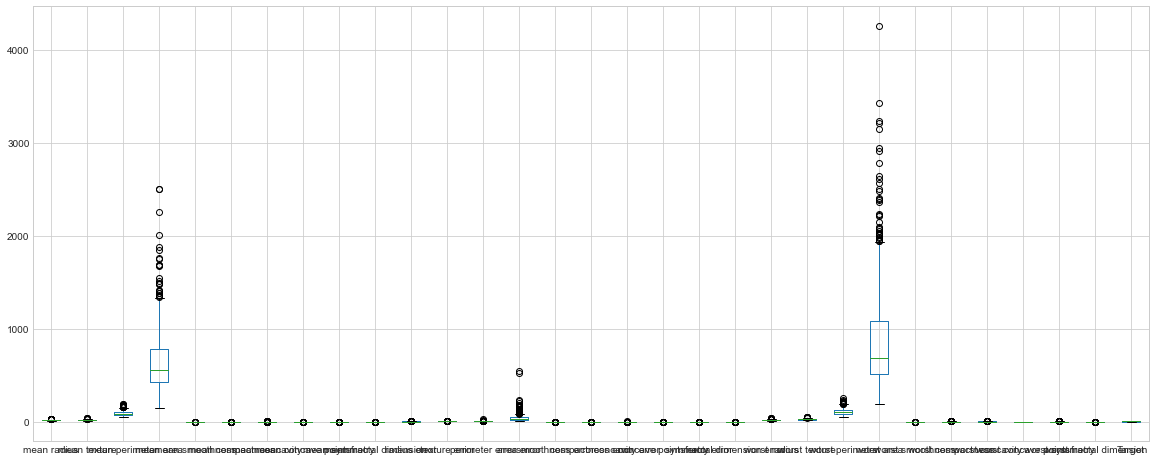

In [59]:
df.boxplot(figsize=(20,8));

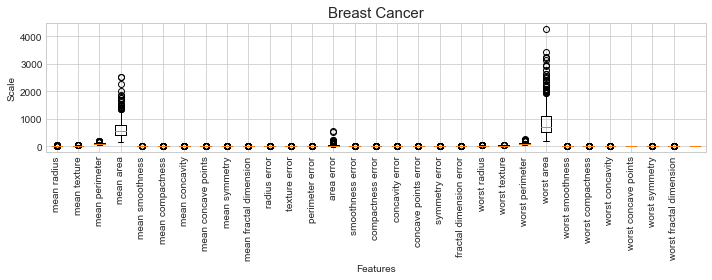

In [62]:
fig = plt.figure(figsize=[10,4])
plt.title("Breast Cancer", fontsize=15)
plt.boxplot(df)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Scale")
plt.tight_layout()

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## 유방암 데이터에 대한 로지스틱 회귀

In [68]:
X, y = load_breast_cancer(return_X_y=True)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                   stratify=y, test_size=0.2)

In [72]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [73]:
print("학습 테이터 점수 : ", model.score(X_train, y_train))
print("학습 테이터 점수 : ", model.score(X_test, y_test))

학습 테이터 점수 :  0.9604395604395605
학습 테이터 점수 :  0.9649122807017544


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [77]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [78]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    test_size=0.2)

In [79]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss="squared_loss"))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [80]:
print("학습 테이터 점수 : ", model.score(X_train, y_train))
print("학습 테이터 점수 : ", model.score(X_test, y_test))

학습 테이터 점수 :  0.7501506406682666
학습 테이터 점수 :  0.6611951244033664


## 붓꽃 데이터에 대한 SGD 분류

In [91]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris, load_breast_cancer

In [86]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [88]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss="log"))
# log -> logistic의 약자이다. 
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [89]:
print("학습 테이터 점수 : ", model.score(X_train, y_train))
print("학습 테이터 점수 : ", model.score(X_test, y_test))

학습 테이터 점수 :  0.9333333333333333
학습 테이터 점수 :  0.9333333333333333


## 유방암 데이터에 대한 SGD 분류

In [92]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [93]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss="log")) 
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [94]:
print("학습 테이터 점수 : ", model.score(X_train, y_train))
print("학습 테이터 점수 : ", model.score(X_test, y_test))

학습 테이터 점수 :  0.9846153846153847
학습 테이터 점수 :  0.956140350877193
